# Statistical Data Analysis Project 2022
Project report of UTU course Statistical Data Analysis from autumn 2022.

The goal was to analyze some data collected from City of Kuopio rental electric bicycles. The data vas provided by the course instructor.

### Initial preparation
First we're going to load the data, print some information and first few rows of the data to see how it looks like.

In [134]:
# Import necessary libraries, load data
import pandas as pd

df = pd.read_csv("data/bikes.data")

# Print info of data and change necessary column types to categorical

print(df.info())
print("\n")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticket            2000 non-null   object 
 1   cost              2000 non-null   float64
 2   month             2000 non-null   int64  
 3   location_from     2000 non-null   object 
 4   location_to       2000 non-null   object 
 5   duration          2000 non-null   int64  
 6   distance          2000 non-null   int64  
 7   assistance        2000 non-null   int64  
 8   energy_used       2000 non-null   float64
 9   energy_collected  2000 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 156.4+ KB
None


   ticket  cost  month location_from location_to  duration  distance  \
0  season  0.00      7      TEATTERI    TEATTERI         3         0   
1  single  0.35      7          TORI    TEATTERI       416       820   
2  season  0.00      8          TORI      

There are clearly some qualitative and some categorical variables included, so next we'll convert the categorical variable columns to categorical type and check their unique values.

In [135]:
# Convert variable types
df['ticket'] = df['ticket'].astype('category')
df['month'] = df['month'].astype('category')
df['location_from'] = df['location_from'].astype('category')
df['location_to'] = df['location_to'].astype('category')
df['assistance'] = df['assistance'].astype('category')

# Get unique values of each categorical column
print("Ticket categories:")
print(df.ticket.unique())
print("\n")
print("Month categories:")
print(df.month.unique())
print("\n")
print("Start location categories:")
print(df.location_from.unique())
print("\n")
print("End location categories:")
print(df.location_to.unique())
print("\n")
print("Assistance categories:")
print(df.assistance.unique())

Ticket categories:
['season', 'single', 'savonia']
Categories (3, object): ['savonia', 'season', 'single']


Month categories:
[7, 8, 5, 6, 9, 10, 4]
Categories (7, int64): [4, 5, 6, 7, 8, 9, 10]


Start location categories:
['TEATTERI', 'TORI', 'MICROTEKNIA', 'RYPYSUO', 'SATAMA', 'KYS', 'SNELLMANIA', 'UIMAHALLI', 'VÄINÖLÄNNIEMI', 'PETONEN']
Categories (10, object): ['KYS', 'MICROTEKNIA', 'PETONEN', 'RYPYSUO', ..., 'TEATTERI', 'TORI', 'UIMAHALLI', 'VÄINÖLÄNNIEMI']


End location categories:
['TEATTERI', 'SATAMA', 'TORI', 'KYS', 'VÄINÖLÄNNIEMI', 'RYPYSUO', 'MICROTEKNIA', 'SNELLMANIA', 'UIMAHALLI', 'PETONEN']
Categories (10, object): ['KYS', 'MICROTEKNIA', 'PETONEN', 'RYPYSUO', ..., 'TEATTERI', 'TORI', 'UIMAHALLI', 'VÄINÖLÄNNIEMI']


Assistance categories:
[0, 1]
Categories (2, int64): [0, 1]


Map assistance categories to 0 = no and 1 = yes.

In [136]:
df['assistance']=df['assistance'].map({0: 'no', 1: 'yes'})

### The data

The data for the assigment consists of 2000 rows which represent a single rental bicycle trip. Each row has 10 variables which are described below.

| variable      | description   | type |
| ------------- |-------------  | ----- |
| **ticket**      | ticket type | categorical |
| **cost**      | paid fee in euros      | quantitative |
| **month** | calendar month during which the trip was made      | categorical |
| **location_from** | start location      | categorical |
| **location_to** | end location      | categorical |
| **duration** | travel time in seconds      | quantitative |
| **distance** | travel duration in metres      | quantitative |
| **assistance** | status of electric assistance      | categorical |
| **energy_used** | energy consumed by bike in watt-hours      | quantitative |
| **energy_collected** | energy collected by bike in watt-hours      | quantitative |

The categorical variables have different categories which are (per variable):
- ticket: 'savonia', 'season', 'single'
- month: 4, 5, 6, 7, 8, 9, 10 representing months from April to October
- location_from: 'TEATTERI', 'SATAMA', 'TORI', 'KYS', 'VÄINÖLÄNNIEMI', 'RYPYSUO', 'MICROTEKNIA', 'SNELLMANIA', 'UIMAHALLI', 'PETONEN'
- location_to: 'TEATTERI', 'SATAMA', 'TORI', 'KYS', 'VÄINÖLÄNNIEMI', 'RYPYSUO', 'MICROTEKNIA', 'SNELLMANIA', 'UIMAHALLI', 'PETONEN'
- assistance: 'yes', 'no'

### Basic statistics, distributions

Let's start the actual analysis by counting some basic summary statistics for quantitative variables and plotting distributions of each variable.

In [137]:
# Import seaborn for plotting
import seaborn as sns

# Get summary statistics from the qualitative variables
print(df.describe())

             cost     duration     distance  energy_used  energy_collected
count  2000.00000  2000.000000   2000.00000  2000.000000       2000.000000
mean      0.22345   539.975500   1721.93000    11.761300          4.389300
std       0.47570   593.810888   2017.79918    15.573439          5.990604
min       0.00000     1.000000  -3320.00000     0.000000          0.000000
25%       0.00000   144.750000     40.00000     0.000000          0.000000
50%       0.00000   400.000000   1130.00000     7.100000          2.400000
75%       0.30000   736.750000   2572.50000    18.500000          6.900000
max       6.95000  8292.000000  19740.00000   184.300000         91.500000


The summary statistics show that there exists at least one distance value that is negative. It's better to drop all the rows containing negative distance to ensure data is good for analysis.

In [138]:
# Drop rows containing distance < 0, check result
df = df[df.distance > 0]
print(df.describe())

              cost     duration      distance  energy_used  energy_collected
count  1559.000000  1559.000000   1559.000000  1559.000000       1559.000000
mean      0.273573   665.416934   2212.245029    15.086851          5.630725
std       0.525118   607.612498   2030.955678    16.155245          6.249129
min       0.000000    21.000000     10.000000     0.000000          0.000000
25%       0.000000   297.000000    920.000000     3.550000          1.200000
50%       0.000000   516.000000   1650.000000    11.500000          4.500000
75%       0.400000   843.500000   3010.000000    21.800000          7.950000
max       6.950000  8292.000000  19740.000000   184.300000         91.500000


There were total of 441 bicycle rentals where distance was negative in the dataset. Those rows have now been dropped and the there are 1559 observed trips in total.

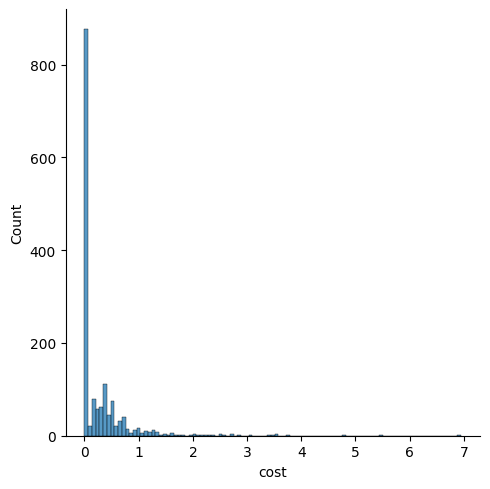

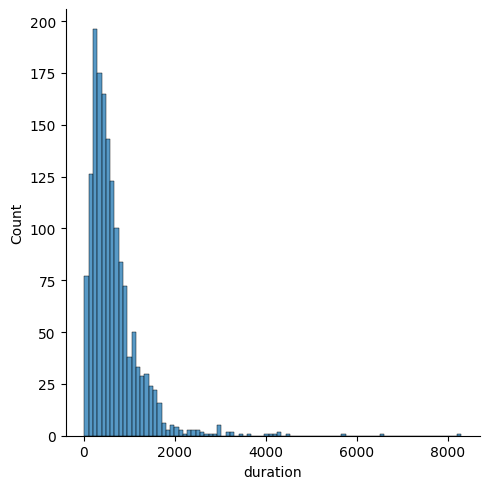

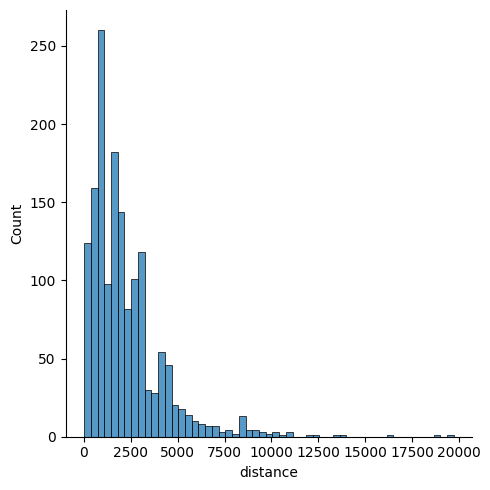

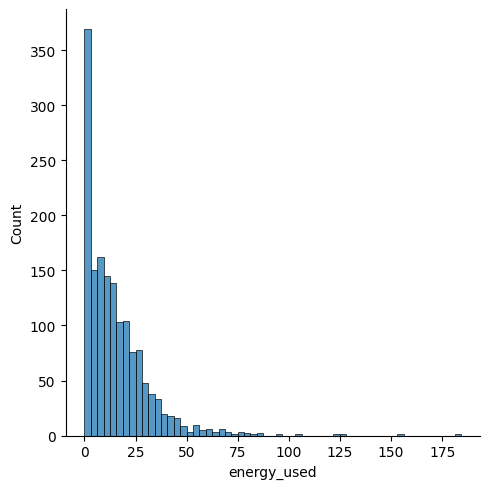

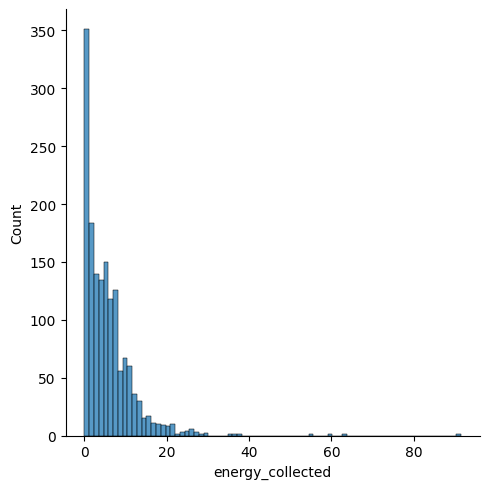

In [159]:
# Plot distributions of the quantitative variables
sns.displot(df, x="cost")
sns.displot(df, x="duration")
sns.displot(df, x="distance")
sns.displot(df, x="energy_used")
sns.displot(df, x="energy_collected")

By looking at the distributions of the quantitative variables above, looks like that most of the rental trips are on the short side. Next we'll plot distributions of the categorical variables.

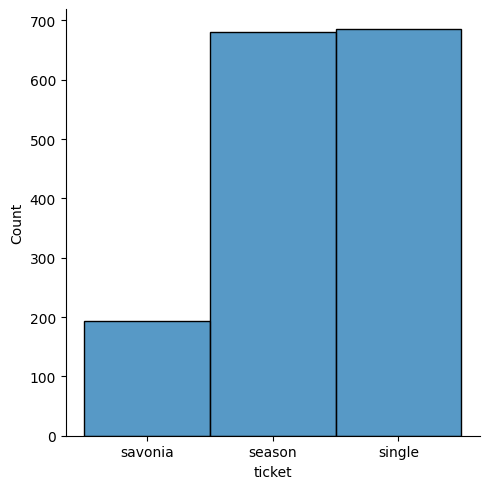

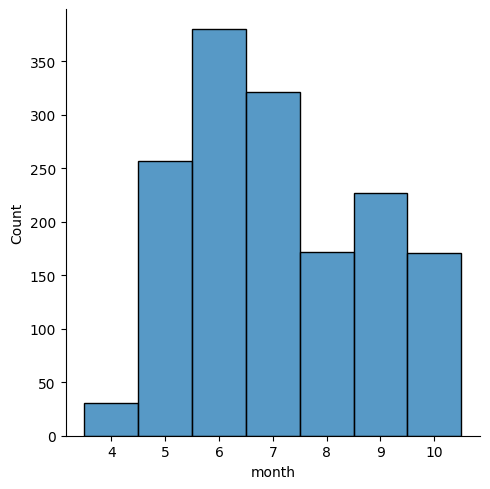

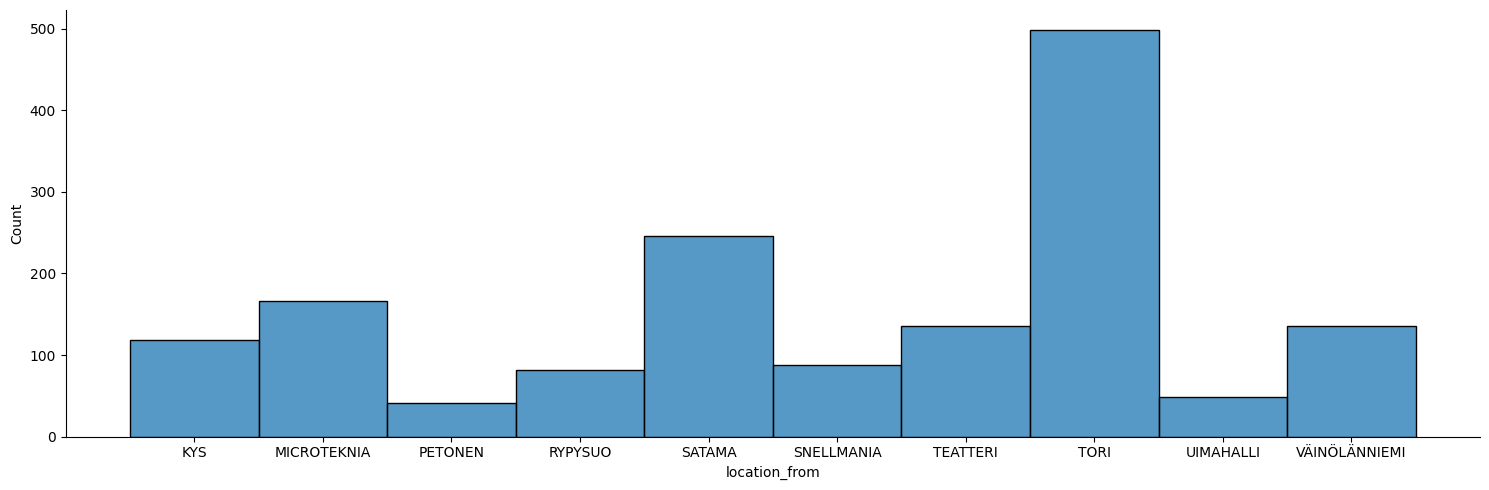

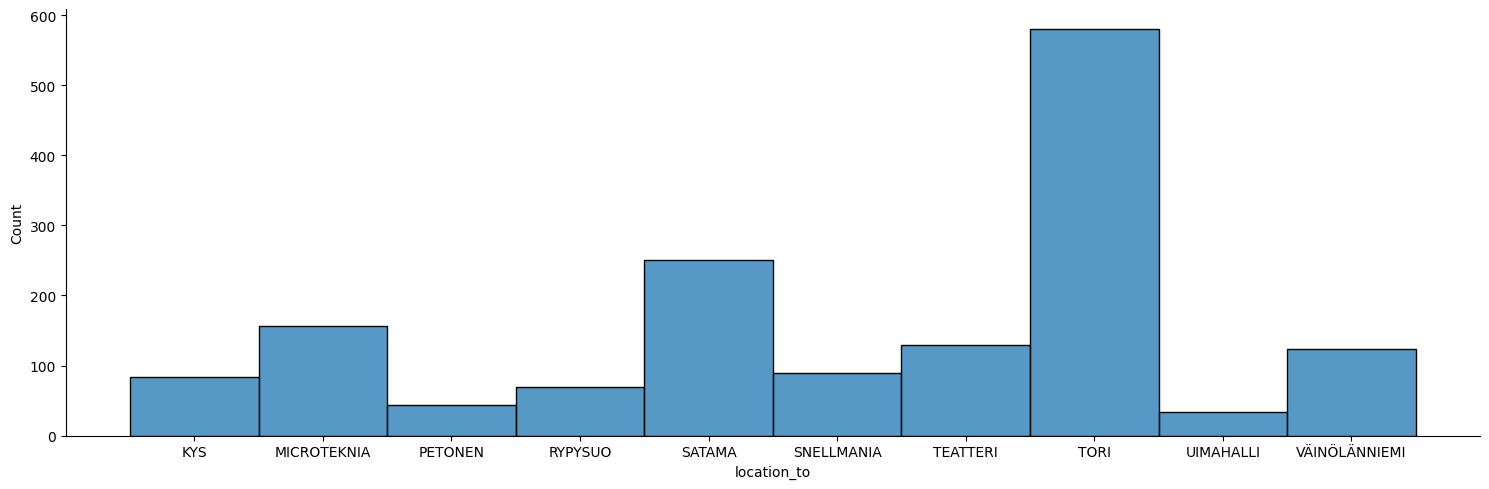

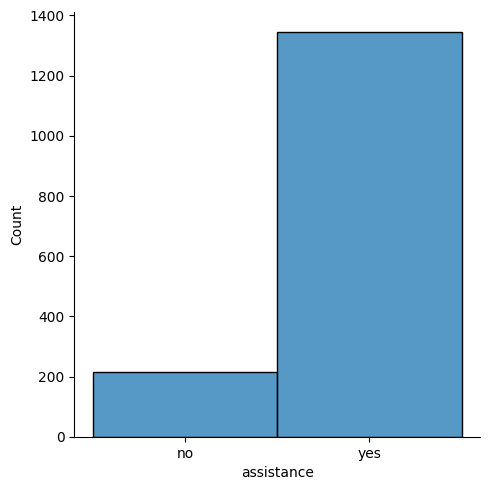

In [140]:
import matplotlib.pyplot as plt

sns.displot(df, x="ticket")
sns.displot(df, x="month")
sns.displot(df, x="location_from", height=5, aspect=3)
sns.displot(df, x="location_to", height=5, aspect=3)
sns.displot(df, x="assistance")

Based on only distributions of categorical variables, one can make few coarse assumptions:
- savonia-ticket class is the least used in terms of total trips made
- June and July are the busiest months in terms of total trips made
- Tori and Satama are the busiest locations for both starting and ending the trips
- electric assistance is used on most trips

### Data exploration

After taking some observations and getting used to data, it is possible to start exploring and analyzing it a bit deeper.

##### 1. Calculate the total distance travelled, the total time travelled, and the total amount of fees paid per ticket type.

In [141]:
print(df.groupby('ticket')['distance'].sum())
print("\n")
print(df.groupby('ticket')['duration'].sum())
print("\n")
print(df.groupby('ticket')['cost'].sum())

ticket
savonia     408580
season     1419140
single     1621170
Name: distance, dtype: int64


ticket
savonia    120374
season     436375
single     480636
Name: duration, dtype: int64


ticket
savonia      0.0
season       8.0
single     418.5
Name: cost, dtype: float64


The most distance is used by single ticket type. Also the duration on all single ticket type rides is the highest. As the distributions before show, the single ticket type has also the most trips (by fine margin to seasonal tickets). The season ticket has low cost as the cost comes from rides over 30min, but it doesn't take the seasonal/monthly bill into account. Same would go for Savonia ticket class, but there might not be any rides over 30min (extra fees checked from website https://kaupunkipyorat.kuopio.fi/).

##### 2. Calculate the mean distance travelled, the mean energy consumed, and the mean energy collected per status of assistance.

In [142]:
print(df.groupby('assistance')['distance'].mean())
print("\n")
print(df.groupby('assistance')['energy_used'].mean())
print("\n")
print(df.groupby('assistance')['energy_collected'].mean())

assistance
no     1491.116279
yes    2327.604167
Name: distance, dtype: float64


assistance
no      0.000000
yes    17.500298
Name: energy_used, dtype: float64


assistance
no     2.836744
yes    6.077679
Name: energy_collected, dtype: float64


From these grouped means, it seems that trips with electric assistance tend to be longer than those without assistance. It's quite obvious that there weren't energy consuming when the electric assistance was of, but the results reveal that even the assistance was off, the bicycles still collect energy.

##### 3. Find the three most popular locations per ticket type in terms of the number of trips that either started or ended at the location.

In [196]:
data1 = df['location_from'].groupby(df['ticket']).value_counts()
data2 = df['location_to'].groupby(df['ticket']).value_counts()
merged_data = pd.concat([data1, data2], axis=1)
merged_data['location_sum'] = merged_data['location_from']+merged_data['location_to']
print(merged_data)

                       location_from  location_to  location_sum
ticket                                                         
savonia MICROTEKNIA               64           56           120
        TORI                      55           62           117
        SATAMA                    21           17            38
        SNELLMANIA                19           19            38
        TEATTERI                  11           15            26
        UIMAHALLI                  7            3            10
        KYS                        6           12            18
        RYPYSUO                    5            6            11
        VÄINÖLÄNNIEMI              4            2             6
        PETONEN                    1            1             2
season  TORI                     219          254           473
        SATAMA                   102          107           209
        VÄINÖLÄNNIEMI             64           77           141
        TEATTERI                  61    

After some grouping and merging the result dataframe printed above.
- Three most popular locations with savonia ticket type are: Microteknia, Tori and Satama
- Three most popular locations with season ticket type are: Tori, Satama and Väinölänniemi
- Three most popular locations with single ticket type are: Tori, Satama and Väinölänniemi

The savonia ticket class has Microteknia as the most popular location. This could be explained by the fact that Savonia university of applied sciences have a campus near the bike stop and the ticket type is for the academy's students and staff (checked from Google Maps and https://kaupunkipyorat.kuopio.fi/). Looks like the station is named Savilahti nowadays.

##### 4. Visualise monthly rental activity per ticket type in terms of total distance travelled.

<AxesSubplot: xlabel='month', ylabel='distance'>

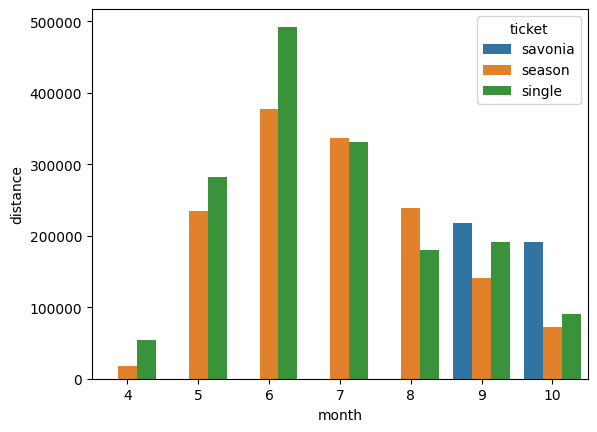

In [143]:
sns.barplot(y=df['distance'], x=df['month'], hue=df['ticket'], errorbar=None, estimator=sum)

From the visualization it looks like the single ticket type has been the most used in terms of distance driven from April to June, After that, in July and August the season tickets have overtaken the single ticket type. This could be e.g. because of higher amount of tourists in May and June or a marketing campaing for the seasonal tickets in June or just simply by the fact that single ticket type users tend to ride longer trips. In September the Savonia ticket class (which is a free tier for Savonia university of applied sciences staff and students) becomes the most travelled by distance. This could be because of the semester starts in the beginning of september or because of the ticket type was released in September.


##### 5. Visualise the distribution of net energy gain, which is defined as the difference between the energy collected and consumed during a trip.

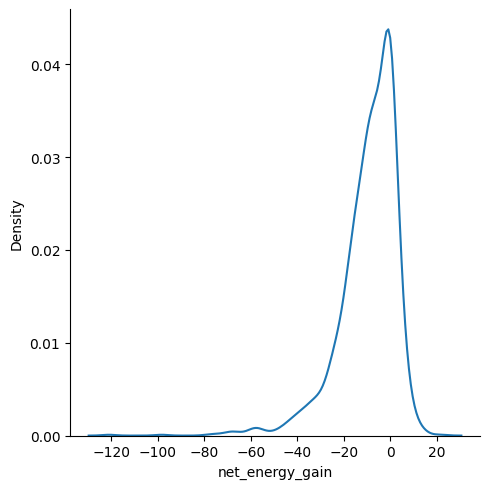

In [144]:
df['net_energy_gain'] = df['energy_collected']-df['energy_used']
sns.displot(df, x="net_energy_gain", kind="kde")

From the above plot it could be said that there has been more energy used than gained in trips of the given dataset.


##### 6. Visualise the pairwise relationships between the quantitative variables.

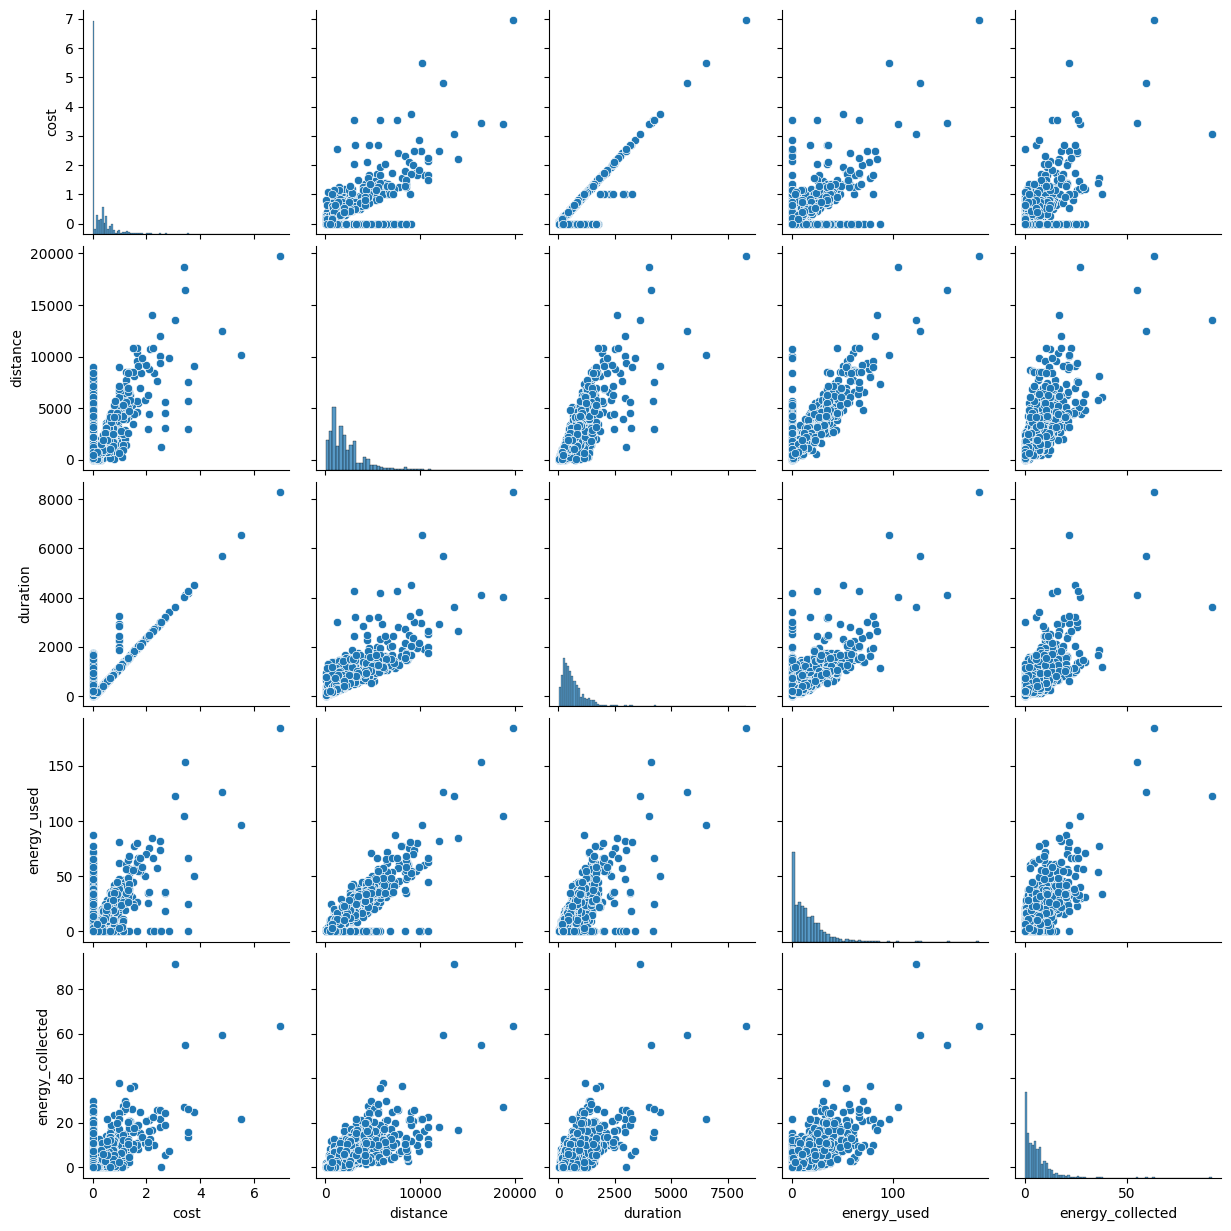

In [145]:
sns.pairplot(df[['cost','distance', 'duration', 'energy_used', 'energy_collected']])

From the pair plots the only clear correlation is between the cost and duration variables, which is kind of clear as the cost of usage is duration based when bicycles are used on single tickets. It could also be said that distance and energy usage have somewhat of a correlation as energy usage tends to increase when distance increases.

### Hypothesis testing

Finally we'll run some statistical between various variables of the dataset.

##### The p-value

The p-value is a number which is calculated from a statistical test. It describes the likelihood of founding a particular set of observations if the null hypothesis were true. In hypothesis testing p-values are used in helping to decide whether to reject the null hypothesis. To put it simply: smaller the p-value, more likely the null hypothesis gets rejected.

##### The null hypothesis
In all statistical tests there is a null hypothesis. In most of the tests, the null hypothesis is that there exist no relationship between the tested variables or that no difference is found among groups.

##### 1. Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type?

In [146]:
from scipy import stats

print(stats.shapiro(df.loc[df['ticket'] == 'single']['duration']))
print('\n')
print(stats.shapiro(df.loc[df['ticket'] == 'season']['duration']))
print('\n')
print(stats.mannwhitneyu(df.loc[df['ticket'] == 'single']['duration'], df.loc[df['ticket'] == 'season']['duration'], use_continuity=True,alternative='two-sided'))

ShapiroResult(statistic=0.6261976361274719, pvalue=4.9980338776905085e-36)


ShapiroResult(statistic=0.9059003591537476, pvalue=4.540831883299427e-20)


MannwhitneyuResult(statistic=223770.5, pvalue=0.1938436363529379)


First the normality of the two variables were tested and as the p-values are < 0.05, so the data is not normaly distributed. Mann-Whitneys U-test is suited to test two unpaired, not normally distributed variables against each other. 

The result of the U-test (p>0.05) indicates that there is difference between the travel times of single and season ticket trips.

##### 2. Is there statistical evidence to claim that the single and savonia ticket types differ with respect to how often the electric assistance is used?

In [147]:
df_mod = df.loc[df['ticket']!='season']
contigency = pd.crosstab(df_mod['assistance'], df['ticket'])
print(contigency)

#Chi-square test of independence.
c, p, dof, expected = stats.chi2_contingency(contigency)
print('\n')
print("P-value: " + str(p))

ticket      savonia  single
assistance                 
no                7     110
yes             186     575


P-value: 1.2500426008361338e-05


Chi-square test of independence is suited to analyze categorical variables. The null hypothesis is that the groups are different. A good way to apply a chi-squared test is to compute the contigency table first.

The p-value is less than 0.05 hence, the null hypothesis holds at a 95% level of confidence. That means that ticket groups and electric assistance are not independent i.e. there is statistical evidence in that there is difference between the ticket types single and savonia in electric assistance usage.

##### 3. Is there statistical evidence to claim that the travel distances tend to be shorter or longer during one month than during the others? 

In [148]:

print(stats.f_oneway(df.loc[df['month']==4]['distance'],
                    df.loc[df['month']==5]['distance'],
                    df.loc[df['month']==6]['distance'],
                    df.loc[df['month']==7]['distance'],
                    df.loc[df['month']==8]['distance'],
                    df.loc[df['month']==9]['distance'],
                    df.loc[df['month']==10]['distance']))

F_onewayResult(statistic=1.65590398612147, pvalue=0.12821238859183182)


One-way analysis of variance (one-way ANOVA) is a suitable test for testing multiple group means.

In one-way ANOVA, the null hypothesis is that all the group means are equal. As the p-value of the test is greater than 0.05, the null hypothesis can be rejected meaning that at least one of the group means differ from others.

##### 4. Is there statistical evidence to claim that the distance travelled correlates with the energy consumed when the electric assistance is enabled?

In [149]:
df_mod2 = df.loc[df['assistance']=='yes']
print(stats.pearsonr(df_mod2['distance'], df_mod2['energy_used']))

PearsonRResult(statistic=0.918414492445732, pvalue=0.0)


The Pearson correlation test can be used to examine linear correlations between two numerical variables. The null hypothesis is that there is no correlation between the variables.

The result states that the null hypothesis can be rejected e.g. there exist a strong correlation between the distance travelled and energy consumed as the correlation coefficent is ~0.92 and p-value < 0.05.

##### 5. Is there statistical evidence to claim that the savonia and season ticket types differ with respect to how often the trip ends where it started?

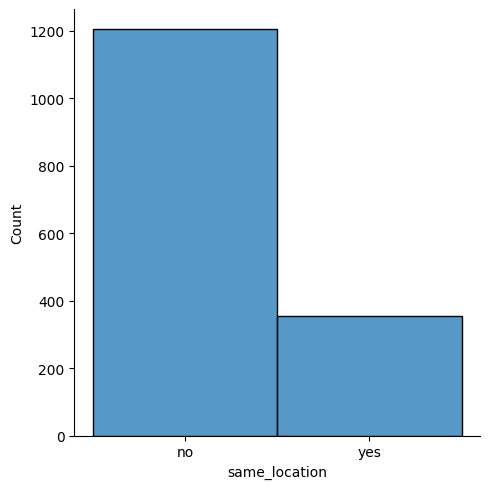

In [150]:
df['same_location']=df['location_from']==df['location_to']
df['same_location']=df['same_location'].map({False: 'no', True: 'yes'})

# Plot the distribution in full dataset
sns.displot(df, x="same_location")
print('\n')

In [151]:
df_mod3 = df.loc[df['ticket']!='single']
contigency2 = pd.crosstab(df_mod3['same_location'], df['ticket'])
print(contigency2)
print('\n')
c2, p2, dof2, expected2 = stats.chi2_contingency(contigency2)
print("P-value: " + str(p2))

ticket         savonia  season
same_location                 
no                 142     520
yes                 51     161


P-value: 0.4832231436031549


Chi-square test of independence is suited to analyze categorical variables. The null hypothesis is that the groups are different.

The p-value is more than 0.05 hence, the null hypothesis can be rejected at a 95% level of confidence. That means that ticket groups and trip starting and ending in same location are independent i.e. there is statistical evidence in that there is no difference between the ticket types season and savonia in trip starting and ending in same location.

##### 6. Is there statistical evidence to claim that the travel time correlates with the average speed at which the trip is made?


PearsonRResult(statistic=0.004698786167904333, pvalue=0.8529310696121277)




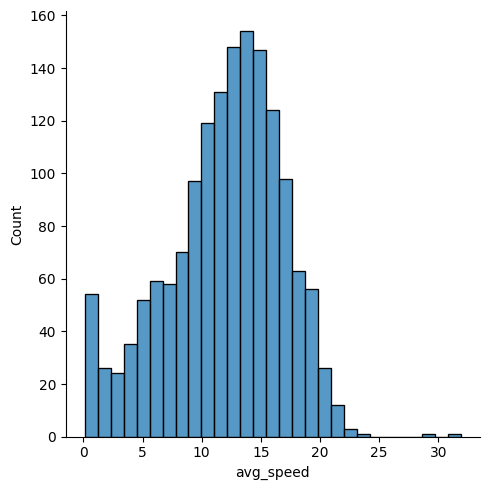

In [158]:
# Make new colum avg_speed, convert to km/h by multiplying by 3.6 as it's a more convenient unit to measure cycling speed
df['avg_speed'] = (df['distance']/df['duration']) * 3.6

# Plot the distribution of average speed
sns.displot(df, x="avg_speed")
print(stats.pearsonr(df['avg_speed'], df['duration']))
print('\n')

The Pearson correlation test can be used to examine linear correlations between two numerical variables. The null hypothesis is that there is no correlation between the variables.

The result states that the null hypothesis holds e.g. there exist no correlation between the average speed and travel time (duration) as the correlation coefficent is ~0.005 and p-value ~ 0.853.